<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/brillo_contraste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install nvcc4jupyter

In [26]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [27]:
import numpy as np
import plotly.express as px
from PIL import Image

imagen = Image.open("/content/suiza_1.jpg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])

(226, 224, 237)


In [28]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [29]:
img = imagen.resize((80,45), Image.LANCZOS)

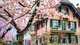

In [30]:
img

In [31]:
imagen_mat = np.array(list(img.getdata(band=0)), int)
list_1 = imagen_mat.tolist()  #MATRIZ en forma de lista
print(list_1)

imagen_mat.shape = (img.size[0], img.size[1])
#print(imagen_mat)

print(imagen_mat.shape)

[188, 215, 178, 155, 193, 200, 151, 173, 180, 210, 164, 221, 233, 192, 202, 167, 154, 200, 191, 224, 207, 206, 179, 211, 197, 220, 202, 234, 206, 200, 213, 227, 233, 241, 248, 175, 167, 85, 81, 115, 190, 209, 206, 189, 229, 218, 237, 232, 211, 209, 220, 208, 202, 219, 216, 255, 233, 211, 215, 231, 175, 151, 130, 154, 156, 166, 166, 139, 201, 255, 237, 238, 242, 241, 241, 239, 240, 243, 245, 245, 209, 233, 213, 173, 154, 197, 210, 234, 232, 238, 229, 209, 223, 205, 200, 186, 171, 216, 166, 184, 222, 194, 177, 159, 221, 239, 233, 248, 238, 223, 227, 216, 220, 163, 136, 109, 81, 70, 208, 142, 192, 197, 190, 204, 231, 224, 233, 240, 212, 199, 224, 215, 217, 224, 223, 228, 250, 234, 217, 193, 128, 139, 132, 136, 133, 135, 145, 141, 133, 184, 243, 235, 232, 238, 235, 240, 244, 247, 252, 250, 220, 219, 223, 225, 193, 191, 217, 203, 207, 212, 212, 185, 178, 185, 198, 218, 187, 215, 106, 60, 197, 184, 163, 211, 232, 199, 223, 228, 241, 246, 204, 194, 227, 216, 203, 67, 81, 97, 52, 103, 221, 201

In [32]:
#fig = px.imshow(imagen_mat, color_continuous_scale='gray')
#fig.show()

In [33]:
# import cv2
# from matplotlib import pyplot as plt

# imagen = cv2.imread("/content/Jubilado_1.jpg", cv2.IMREAD_GRAYSCALE)
# ##cv2.imshow("tulipan.jpg", img)

# hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
# plt.plot(hist, color='gray' )

# plt.xlabel('intensidad de iluminacion')
# plt.ylabel('cantidad de pixeles')
# plt.show()

# cv2.destroyAllWindows()
# #print(hist)

In [34]:
imagen_2 = Image.open("/content/suiza_2.jpg")
fig_2 = px.imshow(imagen_2)
fig_2.show()
pixel_2 = imagen_2.load()
print(pixel_2[0,0])

(26, 159, 224)


In [35]:
img_2 = imagen_2.resize((80,45), Image.LANCZOS)

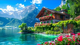

In [36]:
img_2

In [37]:
imagen_mat_2 = np.array(list(img_2.getdata(band=0)), int)
list_2 = imagen_mat_2.tolist()
print(list_2) #### usaremos esta para la matriz del C++
                              ### Y             X
imagen_mat_2.shape = (img_2.size[1], img_2.size[0])
#print(imagen_mat_2)

print(imagen_mat_2.shape)

[11, 11, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 7, 81, 114, 14, 20, 16, 16, 5, 7, 123, 169, 236, 212, 199, 233, 245, 208, 201, 158, 51, 8, 9, 10, 9, 10, 11, 10, 9, 9, 8, 8, 9, 9, 9, 9, 8, 9, 7, 48, 88, 35, 11, 123, 164, 33, 37, 46, 47, 37, 31, 31, 43, 39, 65, 53, 37, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 2, 1, 0, 74, 54, 0, 3, 6, 12, 52, 38, 167, 208, 236, 191, 164, 171, 221, 233, 205, 127, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 96, 143, 50, 61, 124, 87, 1, 25, 44, 47, 47, 23, 31, 39, 25, 36, 78, 53, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 3, 1, 1, 0, 77, 140, 158, 242, 242, 184, 191, 194, 234, 255, 194, 98, 7, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 4, 0, 124, 170, 79, 45, 65, 69, 37, 27, 41, 51, 38, 38, 44, 58, 63, 43, 33, 53, 50, 10, 12, 15, 17, 19, 20, 18, 17, 11, 3, 2, 0, 0, 1, 2, 0, 9, 77, 52, 41, 96, 59, 0, 0, 2, 3, 2, 1, 4, 4, 0, 25, 119, 212

In [38]:
print(imagen_mat_2.shape)

(45, 80)


In [39]:

#fig_2 = px.imshow(imagen_mat_2, color_continuous_scale='gray')
#fig_2.show()

In [40]:
# imagen_2 = cv2.imread("/content/jkcaptura.png", cv2.IMREAD_GRAYSCALE)
# ##cv2.imshow("tulipan.jpg", img)

# hist_2 = cv2.calcHist([imagen_2], [0], None, [256], [0, 256])
# plt.plot(hist_2, color='gray' )

# plt.xlabel('intensidad de iluminacion')
# plt.ylabel('cantidad de pixeles')
# plt.show()

# cv2.destroyAllWindows()
# #print(hist)

In [41]:
#np.hstack(hist_2.astype("i"))

In [42]:
#int arr[4][2] = {1234, 56, 1212, 33, 1434, 80, 1312, 78};


In [43]:
%%cuda
#include <stdio.h>
#include <cuda_runtime.h>
#include <sys/time.h>
#include <iostream>
#include <iostream>

// CUDA kernel function to perform element-wise addition and division
__global__ void brillo_contraste(float *A, float *B, float *R, int rows, int cols) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < cols && y < rows) {
        int index = y * cols + x;
        float sum = A[index] + 5;
        R[index] = fminf(fmaxf(sum, 0.0f), 255.0f);
    }
}

int main() {
    const int rows = 80;
    const int cols = 45;
    const int size = rows * cols;

    float h_A[rows][cols] = {11, 11, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 7, 81, 114, 14, 20, 16, 16, 5, 7, 123, 169, 236, 212, 199, 233, 245, 208, 201, 158, 51, 8, 9, 10, 9, 10, 11, 10, 9, 9, 8, 8, 9, 9, 9, 9, 8, 9, 7, 48, 88, 35, 11, 123, 164, 33, 37, 46, 47, 37, 31, 31, 43, 39, 65, 53, 37, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 2, 1, 0, 74, 54, 0, 3, 6, 12, 52, 38, 167, 208, 236, 191, 164, 171, 221, 233, 205, 127, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 96, 143, 50, 61, 124, 87, 1, 25, 44, 47, 47, 23, 31, 39, 25, 36, 78, 53, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 3, 1, 1, 0, 77, 140, 158, 242, 242, 184, 191, 194, 234, 255, 194, 98, 7, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 4, 0, 124, 170, 79, 45, 65, 69, 37, 27, 41, 51, 38, 38, 44, 58, 63, 43, 33, 53, 50, 10, 12, 15, 17, 19, 20, 18, 17, 11, 3, 2, 0, 0, 1, 2, 0, 9, 77, 52, 41, 96, 59, 0, 0, 2, 3, 2, 1, 4, 4, 0, 25, 119, 212, 161, 52, 116, 156, 155, 136, 111, 45, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3, 1, 25, 152, 215, 119, 100, 91, 47, 57, 96, 82, 60, 45, 35, 49, 68, 76, 35, 34, 54, 61, 43, 41, 40, 42, 46, 55, 60, 56, 54, 41, 24, 14, 5, 6, 2, 37, 116, 134, 92, 163, 255, 188, 68, 98, 12, 1, 0, 0, 0, 0, 19, 75, 121, 117, 111, 42, 0, 0, 24, 40, 8, 4, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 94, 186, 200, 133, 143, 128, 97, 63, 92, 91, 63, 51, 38, 60, 80, 83, 82, 66, 63, 65, 63, 58, 54, 54, 61, 68, 77, 147, 168, 112, 121, 51, 35, 37, 35, 63, 105, 96, 95, 130, 173, 226, 243, 242, 50, 5, 30, 57, 64, 80, 106, 109, 136, 133, 102, 59, 0, 7, 65, 87, 12, 11, 0, 0, 0, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 11, 123, 169, 157, 172, 75, 75, 75, 106, 35, 82, 77, 67, 79, 85, 87, 86, 75, 91, 92, 53, 43, 82, 80, 76, 86, 78, 83, 136, 251, 251, 241, 234, 122, 76, 55, 62, 58, 58, 73, 125, 189, 175, 221, 237, 217, 158, 83, 110, 149, 169, 155, 110, 86, 106, 116, 126, 87, 22, 0, 3, 6, 9, 4, 17, 54, 59, 11, 0, 0, 1, 1, 1, 1, 0, 2, 3, 0, 12, 46, 79, 158, 198, 143, 94, 61, 63, 72, 93, 36, 67, 92, 80, 97, 96, 83, 62, 46, 56, 69, 27, 26, 91, 91, 96, 115, 96, 94, 159, 250, 252, 255, 242, 231, 200, 126, 101, 99, 122, 85, 100, 138, 161, 130, 164, 225, 203, 144, 157, 187, 155, 95, 90, 103, 135, 139, 133, 87, 162, 124, 7, 11, 13, 3, 72, 140, 179, 95, 52, 28, 0, 0, 0, 1, 1, 0, 0, 45, 75, 94, 88, 85, 165, 141, 78, 68, 64, 72, 80, 35, 13, 66, 92, 82, 95, 87, 66, 43, 30, 25, 20, 26, 210, 195, 132, 118, 132, 126, 146, 244, 255, 230, 245, 238, 217, 179, 126, 186, 196, 98, 96, 97, 100, 117, 132, 143, 156, 143, 118, 165, 142, 90, 75, 78, 119, 148, 129, 33, 52, 88, 11, 0, 0, 27, 89, 82, 87, 121, 133, 81, 26, 16, 6, 0, 5, 19, 84, 123, 66, 55, 54, 51, 53, 106, 82, 51, 57, 75, 46, 20, 9, 54, 71, 74, 95, 86, 74, 32, 23, 25, 49, 33, 187, 235, 220, 207, 238, 237, 212, 237, 245, 244, 242, 243, 230, 216, 151, 186, 243, 206, 156, 142, 136, 122, 127, 147, 145, 107, 117, 121, 114, 104, 94, 119, 150, 128, 53, 32, 3, 22, 57, 28, 16, 79, 88, 84, 77, 61, 81, 120, 117, 84, 54, 39, 41, 70, 94, 76, 57, 75, 63, 32, 21, 168, 127, 74, 81, 58, 34, 18, 11, 34, 59, 71, 90, 85, 52, 46, 17, 25, 57, 36, 41, 107, 223, 229, 205, 187, 240, 218, 201, 242, 200, 195, 212, 236, 206, 196, 229, 210, 157, 155, 171, 208, 191, 165, 132, 110, 113, 107, 143, 122, 122, 116, 79, 40, 10, 12, 8, 36, 33, 50, 91, 89, 80, 75, 44, 44, 73, 78, 94, 121, 128, 109, 92, 77, 60, 44, 67, 106, 82, 74, 57, 102, 72, 47, 49, 47, 44, 39, 70, 86, 92, 76, 79, 83, 39, 40, 21, 25, 49, 23, 109, 100, 159, 234, 184, 159, 169, 199, 176, 174, 156, 149, 152, 167, 152, 137, 146, 167, 204, 205, 198, 220, 180, 117, 116, 119, 102, 105, 171, 124, 106, 83, 43, 8, 10, 20, 4, 31, 30, 45, 89, 71, 70, 53, 33, 26, 72, 75, 75, 70, 79, 117, 135, 122, 101, 83, 74, 85, 87, 73, 75, 66, 88, 45, 62, 26, 25, 41, 72, 52, 89, 80, 72, 79, 39, 24, 23, 17, 28, 14, 119, 127, 134, 168, 218, 189, 156, 154, 170, 209, 215, 200, 199, 163, 130, 138, 154, 182, 177, 172, 164, 136, 114, 146, 123, 108, 73, 76, 115, 84, 67, 42, 23, 8, 3, 5, 4, 21, 47, 83, 79, 85, 79, 52, 73, 87, 69, 78, 73, 84, 71, 90, 95, 109, 80, 55, 65, 69, 87, 95, 109, 154, 206, 129, 98, 35, 25, 24, 59, 68, 74, 74, 77, 89, 44, 81, 27, 5, 10, 18, 97, 124, 133, 119, 118, 123, 128, 140, 147, 185, 214, 239, 192, 165, 130, 135, 125, 135, 172, 170, 154, 117, 131, 131, 123, 90, 65, 85, 67, 30, 17, 11, 19, 23, 7, 3, 1, 13, 76, 78, 86, 67, 56, 55, 93, 91, 40, 59, 94, 94, 89, 72, 69, 60, 44, 34, 29, 38, 48, 55, 67, 86, 114, 121, 98, 76, 53, 31, 44, 46, 66, 67, 81, 82, 31, 75, 37, 28, 26, 38, 81, 89, 95, 95, 95, 95, 94, 104, 131, 174, 199, 168, 129, 162, 147, 132, 127, 125, 166, 136, 125, 118, 106, 110, 105, 75, 94, 79, 15, 3, 5, 2, 6, 18, 39, 24, 10, 58, 80, 77, 78, 43, 49, 82, 85, 72, 58, 54, 54, 113, 93, 27, 76, 101, 84, 51, 50, 51, 41, 37, 28, 33, 35, 49, 63, 65, 58, 52, 44, 41, 70, 55, 90, 71, 51, 17, 11, 27, 17, 31, 91, 91, 93, 96, 100, 100, 103, 103, 103, 114, 118, 113, 115, 140, 150, 136, 127, 120, 131, 128, 143, 105, 98, 98, 76, 90, 98, 55, 10, 0, 0, 2, 3, 20, 31, 23, 47, 73, 64, 67, 45, 48, 58, 62, 25, 55, 103, 99, 119, 174, 133, 49, 145, 162, 91, 59, 70, 78, 67, 58, 20, 6, 11, 20, 23, 34, 40, 36, 34, 40, 51, 34, 41, 56, 54, 57, 21, 19, 57, 120, 80, 92, 103, 108, 113, 111, 110, 121, 117, 119, 116, 115, 120, 119, 138, 151, 136, 127, 132, 128, 174, 142, 111, 120, 104, 97, 60, 25, 20, 17, 13, 4, 18, 28, 8, 38, 64, 55, 57, 42, 37, 32, 61, 130, 124, 171, 194, 195, 157, 154, 147, 109, 144, 237, 150, 66, 74, 92, 79, 66, 19, 2, 10, 48, 42, 39, 18, 27, 22, 39, 67, 6, 39, 71, 46, 64, 51, 111, 167, 175, 3, 12, 22, 31, 56, 63, 81, 83, 95, 114, 116, 115, 100, 105, 131, 148, 136, 142, 145, 138, 162, 163, 128, 139, 81, 49, 45, 17, 22, 30, 30, 9, 23, 21, 12, 39, 50, 54, 53, 91, 146, 144, 197, 187, 136, 123, 140, 109, 118, 71, 63, 95, 64, 191, 204, 66, 73, 93, 82, 67, 20, 0, 9, 57, 53, 38, 4, 13, 20, 37, 71, 52, 73, 62, 51, 105, 135, 155, 158, 150, 2, 0, 0, 0, 0, 18, 76, 108, 45, 47, 80, 42, 16, 45, 81, 95, 107, 127, 146, 146, 148, 169, 108, 61, 26, 38, 41, 20, 15, 8, 13, 24, 29, 32, 14, 15, 65, 32, 56, 193, 127, 153, 184, 125, 104, 115, 97, 85, 78, 36, 68, 90, 49, 95, 116, 59, 65, 90, 85, 75, 52, 26, 24, 61, 55, 65, 49, 40, 33, 60, 134, 155, 110, 39, 113, 160, 116, 124, 117, 105, 0, 1, 2, 2, 2, 0, 9, 45, 26, 22, 43, 2, 34, 66, 31, 39, 58, 55, 71, 116, 127, 82, 50, 27, 20, 25, 13, 2, 14, 24, 15, 8, 16, 28, 10, 14, 50, 72, 41, 137, 66, 77, 85, 72, 76, 48, 40, 65, 42, 59, 77, 74, 66, 69, 78, 71, 64, 65, 60, 59, 59, 54, 40, 53, 40, 73, 88, 95, 89, 127, 157, 153, 64, 76, 136, 114, 144, 128, 73, 88, 10, 3, 0, 0, 0, 1, 0, 1, 9, 47, 33, 42, 64, 18, 13, 58, 54, 52, 23, 21, 49, 70, 39, 22, 11, 9, 13, 18, 24, 20, 13, 8, 15, 9, 3, 7, 15, 42, 15, 57, 56, 36, 59, 51, 70, 69, 68, 71, 65, 77, 66, 32, 61, 110, 96, 89, 76, 71, 62, 48, 73, 79, 74, 73, 98, 110, 127, 140, 135, 153, 152, 115, 86, 109, 124, 110, 117, 141, 114, 144, 47, 25, 13, 5, 0, 0, 2, 2, 0, 17, 58, 75, 23, 13, 17, 49, 46, 38, 13, 7, 16, 40, 40, 36, 9, 0, 1, 10, 20, 21, 14, 43, 22, 1, 1, 0, 0, 0, 0, 3, 80, 127, 100, 85, 60, 76, 93, 24, 42, 85, 89, 18, 29, 93, 87, 56, 47, 44, 59, 106, 131, 161, 157, 146, 159, 143, 178, 112, 57, 151, 84, 37, 48, 93, 48, 90, 140, 169, 160, 126, 47, 23, 49, 31, 2, 2, 0, 0, 12, 58, 68, 53, 27, 16, 30, 66, 72, 47, 43, 11, 18, 7, 47, 62, 16, 2, 10, 7, 2, 5, 22, 13, 2, 1, 0, 41, 113, 111, 83, 96, 160, 30, 85, 80, 0, 50, 81, 16, 45, 85, 92, 48, 23, 88, 89, 74, 79, 99, 160, 99, 100, 157, 130, 91, 141, 100, 97, 46, 84, 109, 25, 40, 36, 51, 35, 15, 78, 145, 104, 81, 92, 75, 77, 22, 4, 0, 9, 54, 88, 68, 39, 45, 49, 39, 61, 75, 66, 68, 67, 47, 45, 42, 125, 85, 76, 70, 26, 1, 7, 9, 5, 2, 3, 1, 29, 115, 145, 165, 171, 164, 204, 81, 156, 170, 128, 160, 160, 150, 156, 143, 167, 115, 98, 144, 139, 167, 187, 202, 140, 80, 150, 128, 94, 114, 163, 116, 50, 42, 57, 43, 39, 41, 18, 11, 12, 7, 0, 77, 87, 81, 69, 72, 50, 10, 7, 16, 56, 46, 36, 52, 52, 60, 55, 64, 81, 90, 87, 79, 46, 51, 35, 116, 88, 49, 56, 35, 32, 0, 4, 20, 2, 4, 4, 0, 96, 189, 165, 191, 155, 199, 160, 175, 193, 180, 168, 196, 152, 142, 181, 133, 105, 20, 107, 180, 159, 160, 120, 116, 107, 115, 91, 70, 43, 72, 114, 71, 37, 48, 59, 69, 73, 76, 61, 24, 4, 14, 4, 34, 38, 43, 16, 5, 9, 0, 8, 79, 74, 58, 70, 81, 76, 85, 74, 87, 90, 103, 93, 67, 67, 125, 117, 132, 64, 26, 36, 23, 43, 12, 0, 0, 3, 1, 0, 3, 139, 151, 138, 141, 118, 170, 90, 112, 141, 145, 122, 122, 61, 92, 115, 79, 26, 10, 84, 91, 136, 69, 91, 65, 91, 104, 100, 66, 21, 41, 99, 79, 26, 48, 71, 72, 71, 81, 80, 52, 54, 37, 6, 8, 20, 27, 31, 29, 36, 68, 94, 144, 184, 191, 191, 156, 156, 141, 126, 134, 112, 74, 106, 67, 113, 144, 77, 82, 57, 29, 46, 17, 32, 36, 65, 68, 28, 35, 53, 21, 176, 174, 133, 111, 109, 120, 108, 125, 89, 125, 104, 58, 25, 62, 52, 99, 38, 0, 0, 19, 35, 57, 78, 33, 48, 55, 65, 36, 42, 39, 80, 66, 40, 46, 70, 71, 71, 78, 68, 64, 78, 42, 0, 17, 44, 46, 139, 117, 95, 104, 104, 132, 117, 87, 96, 76, 63, 96, 103, 141, 147, 174, 155, 95, 100, 79, 73, 33, 32, 49, 80, 33, 50, 69, 149, 116, 109, 136, 93, 77, 108, 154, 105, 28, 35, 36, 38, 50, 27, 14, 23, 16, 14, 3, 14, 16, 3, 41, 65, 14, 48, 116, 121, 91, 63, 44, 43, 37, 55, 38, 45, 56, 32, 52, 72, 71, 75, 72, 62, 56, 55, 44, 30, 44, 86, 66, 165, 157, 85, 61, 103, 157, 170, 113, 103, 126, 143, 134, 93, 141, 130, 96, 97, 92, 97, 153, 132, 39, 40, 85, 113, 34, 31, 51, 105, 84, 54, 139, 125, 115, 140, 148, 81, 44, 62, 41, 29, 32, 42, 6, 33, 29, 13, 24, 36, 0, 10, 111, 79, 32, 110, 106, 130, 88, 87, 104, 63, 60, 62, 45, 44, 56, 49, 61, 79, 84, 126, 63, 58, 43, 58, 64, 50, 37, 39, 32, 71, 88, 34, 38, 47, 94, 124, 97, 84, 72, 95, 97, 70, 105, 96, 89, 89, 74, 63, 82, 81, 50, 48, 92, 75, 27, 7, 38, 67, 68, 64, 104, 170, 130, 176, 125, 67, 86, 88, 66, 61, 66, 65, 11, 41, 61, 31, 59, 44, 1, 19, 103, 50, 37, 100, 98, 75, 68, 61, 83, 87, 75, 81, 71, 81, 86, 94, 75, 119, 139, 130, 78, 71, 48, 18, 41, 23, 18, 19, 35, 53, 45, 17, 22, 38, 76, 92, 76, 77, 71, 76, 78, 66, 98, 81, 85, 82, 59, 57, 79, 101, 127, 60, 27, 28, 15, 14, 10, 12, 40, 42, 37, 52, 62, 103, 67, 55, 100, 93, 97, 57, 66, 80, 44, 79, 92, 57, 76, 102, 112, 82, 66, 36, 37, 53, 62, 52, 40, 47, 66, 85, 70, 89, 91, 114, 98, 100, 99, 146, 159, 135, 117, 88, 48, 25, 42, 22, 14, 14, 32, 37, 24, 8, 17, 27, 68, 77, 68, 66, 61, 66, 64, 58, 84, 70, 65, 65, 52, 61, 117, 160, 97, 33, 6, 9, 6, 5, 10, 10, 6, 2, 5, 2, 15, 51, 61, 82, 74, 63, 72, 77, 81, 75, 64, 86, 94, 136, 142, 158, 128, 117, 101, 116, 90, 73, 95, 87, 67, 106, 110, 91, 78, 76, 74, 125, 118, 120, 137, 158, 121, 78, 74, 116, 64, 19, 36, 10, 13, 25, 32, 15, 8, 4, 8, 15, 48, 59, 56, 54, 53, 56, 52, 52, 68, 70, 74, 76, 94, 143, 197, 205, 115, 69, 52, 18, 14, 16, 14, 4, 8, 6, 11, 13, 34, 80, 78, 90, 98, 47, 77, 94, 71, 100, 142, 172, 172, 175, 126, 131, 113, 108, 95, 116, 74, 109, 139, 121, 114, 117, 94, 105, 55, 32, 75, 101, 113, 124, 101, 131, 97, 128, 105, 85, 48, 18, 45, 34, 61, 114, 105, 6, 4, 4, 4, 6, 28, 38, 40, 42, 37, 37, 31, 31, 46, 53, 57, 60, 74, 81, 93, 117, 94, 44, 24, 3, 5, 8, 7, 12, 13, 6, 9, 25, 55, 82, 105, 132, 129, 103, 155, 174, 151, 153, 152, 162, 155, 145, 94, 69, 107, 75, 109, 97, 62, 112, 125, 60, 64, 83, 83, 161, 167, 97, 119, 137, 111, 131, 123, 150, 177, 111, 141, 162, 150, 61, 33, 64, 142, 195, 222, 6, 3, 5, 2, 6, 16, 23, 20, 21, 18, 18, 16, 15, 24, 32, 36, 31, 24, 24, 29, 59, 43, 5, 7, 12, 7, 12, 28, 39, 40, 22, 15, 18, 16, 30, 33, 38, 85, 70, 100, 139, 138, 175, 181, 166, 143, 130, 87, 98, 133, 117, 132, 107, 95, 138, 123, 86, 133, 165, 185, 145, 134, 151, 149, 150, 165, 177, 153, 156, 244, 122, 87, 113, 195, 196, 148, 158, 201, 153, 190, 5, 3, 3, 3, 3, 4, 7, 9, 9, 12, 10, 12, 9, 8, 23, 32, 31, 33, 34, 39, 48, 25, 11, 9, 17, 4, 5, 29, 29, 16, 14, 49, 54, 45, 75, 36, 27, 42, 41, 58, 52, 64, 111, 134, 167, 169, 165, 134, 135, 154, 118, 116, 96, 69, 111, 86, 50, 97, 136, 131, 142, 185, 173, 136, 143, 157, 222, 203, 191, 217, 120, 101, 148, 208, 192, 138, 146, 141, 141, 140, 5, 4, 3, 2, 6, 10, 12, 8, 4, 4, 3, 10, 8, 5, 12, 25, 27, 18, 18, 29, 20, 7, 4, 5, 8, 5, 8, 16, 17, 14, 5, 37, 44, 24, 59, 35, 10, 23, 25, 30, 21, 22, 45, 40, 57, 88, 87, 79, 74, 58, 50, 65, 62, 49, 74, 101, 90, 76, 109, 231, 229, 253, 220, 136, 136, 183, 236, 188, 206, 169, 76, 105, 167, 221, 204, 152, 165, 156, 115, 125, 7, 6, 5, 5, 7, 8, 7, 11, 9, 6, 5, 6, 4, 4, 4, 14, 18, 11, 18, 15, 5, 8, 4, 5, 12, 5, 9, 9, 12, 7, 1, 24, 20, 12, 30, 28, 9, 14, 18, 23, 12, 17, 35, 23, 23, 28, 22, 18, 42, 40, 26, 23, 22, 10, 19, 38, 83, 133, 236, 234, 251, 237, 160, 183, 184, 135, 131, 159, 167, 176, 159, 139, 176, 229, 195, 127, 134, 127, 76, 121, 5, 6, 5, 6, 6, 7, 13, 8, 5, 5, 5, 6, 6, 7, 4, 8, 8, 5, 27, 24, 12, 12, 6, 6, 9, 7, 6, 8, 5, 5, 4, 21, 24, 18, 43, 32, 46, 20, 26, 25, 6, 10, 13, 4, 10, 8, 2, 4, 24, 37, 30, 31, 15, 7, 20, 121, 168, 111, 221, 230, 240, 248, 171, 115, 99, 89, 83, 152, 149, 128, 149, 163, 146, 208, 168, 132, 76, 65, 118, 73, 7, 5, 7, 7, 4, 3, 10, 16, 13, 7, 2, 7, 6, 4, 5, 6, 6, 8, 20, 18, 20, 28, 12, 8, 12, 6, 7, 11, 7, 6, 2, 18, 23, 9, 16, 17, 24, 18, 19, 34, 17, 6, 9, 10, 6, 15, 25, 9, 4, 0, 4, 34, 22, 23, 85, 161, 190, 156, 237, 248, 252, 253, 182, 94, 108, 73, 85, 117, 222, 236, 167, 106, 116, 193, 207, 87, 41, 64, 89, 53, 11, 10, 4, 7, 10, 11, 11, 20, 15, 10, 14, 12, 4, 4, 10, 18, 18, 15, 19, 20, 14, 16, 8, 8, 3, 8, 8, 8, 4, 3, 3, 4, 5, 2, 4, 12, 21, 47, 54, 46, 40, 36, 16, 2, 5, 1, 0, 2, 13, 21, 21, 85, 59, 42, 179, 71, 90, 128, 200, 212, 224, 225, 105, 69, 110, 99, 77, 58, 138, 182, 170, 113, 66, 148, 204, 69, 43, 117, 112, 12, 3, 6, 10, 16, 12, 4, 10, 16, 11, 15, 11, 9, 12, 14, 6, 6, 9, 4, 13, 13, 15, 19, 17, 19, 12, 8, 12, 10, 10, 8, 6, 7, 8, 4, 18, 39, 35, 52, 66, 66, 25, 23, 22, 20, 26, 64, 85, 77, 126, 172, 153, 178, 159, 143, 152, 97, 75, 88, 99, 93, 95, 129, 68, 19, 45, 118, 89, 68, 75, 35, 57, 107, 88, 51, 113, 54, 18, 50, 126, 93, 37, 65, 79, 92, 62, 20, 6, 0, 39, 88, 55, 29, 13, 49, 58, 67, 70, 56, 26, 17, 19, 17, 15, 8, 7, 7, 7, 4, 6, 3, 5, 4, 7, 6, 19, 36, 44, 47, 27, 63, 66, 46, 84, 26, 95, 169, 210, 149, 109, 180, 147, 156, 200, 217, 168, 75, 115, 132, 63, 97, 110, 68, 62, 36, 38, 81, 46, 49, 78, 90, 31, 89, 78, 51, 72, 76, 63, 50, 51, 115, 32, 27, 40, 57, 33, 15, 0, 29, 86, 125, 107, 66, 20, 22, 38, 37, 23, 18, 18, 17, 11, 14, 7, 9, 7, 6, 6, 6, 2, 5, 5, 4, 2, 1, 16, 27, 29, 80, 79, 76, 32, 19, 16, 57, 129, 160, 160, 106, 95, 150, 188, 146, 104, 127, 161, 100, 79, 93, 50, 61, 99, 84, 37, 20, 39, 50, 16, 60, 109, 80, 35, 20, 15, 27, 63, 67, 46, 93, 67, 93, 1, 19, 53, 60, 33, 41, 23, 43, 50, 62, 73, 70, 96, 83, 79, 31, 50, 60, 67, 49, 16, 8, 19, 23, 8, 1, 3, 4, 3, 3, 5, 8, 5, 3, 5, 2, 44, 162, 206, 195, 103, 109, 97, 105, 155, 137, 62, 86, 117, 118, 186, 146, 81, 129, 141, 130, 68, 24, 5, 22, 38, 41, 34, 8, 23, 37, 8, 67, 145, 45, 24, 38, 33, 24, 55, 31, 10, 53, 56, 18};

    float h_B[rows][cols] = {188, 215, 178, 155, 193, 200, 151, 173, 180, 210, 164, 221, 233, 192, 202, 167, 154, 200, 191, 224, 207, 206, 179, 211, 197, 220, 202, 234, 206, 200, 213, 227, 233, 241, 248, 175, 167, 85, 81, 115, 190, 209, 206, 189, 229, 218, 237, 232, 211, 209, 220, 208, 202, 219, 216, 255, 233, 211, 215, 231, 175, 151, 130, 154, 156, 166, 166, 139, 201, 255, 237, 238, 242, 241, 241, 239, 240, 243, 245, 245, 209, 233, 213, 173, 154, 197, 210, 234, 232, 238, 229, 209, 223, 205, 200, 186, 171, 216, 166, 184, 222, 194, 177, 159, 221, 239, 233, 248, 238, 223, 227, 216, 220, 163, 136, 109, 81, 70, 208, 142, 192, 197, 190, 204, 231, 224, 233, 240, 212, 199, 224, 215, 217, 224, 223, 228, 250, 234, 217, 193, 128, 139, 132, 136, 133, 135, 145, 141, 133, 184, 243, 235, 232, 238, 235, 240, 244, 247, 252, 250, 220, 219, 223, 225, 193, 191, 217, 203, 207, 212, 212, 185, 178, 185, 198, 218, 187, 215, 106, 60, 197, 184, 163, 211, 232, 199, 223, 228, 241, 246, 204, 194, 227, 216, 203, 67, 81, 97, 52, 103, 221, 201, 231, 236, 230, 246, 231, 217, 227, 193, 197, 235, 217, 212, 233, 222, 242, 251, 213, 192, 67, 18, 63, 77, 89, 97, 127, 141, 145, 129, 178, 236, 241, 231, 237, 245, 246, 255, 251, 251, 210, 211, 211, 199, 189, 202, 202, 197, 203, 203, 202, 191, 180, 192, 224, 241, 215, 198, 152, 28, 65, 168, 213, 232, 175, 196, 214, 205, 229, 224, 214, 212, 207, 232, 161, 38, 143, 67, 25, 119, 234, 220, 221, 229, 243, 236, 219, 214, 224, 225, 201, 216, 245, 233, 202, 229, 249, 170, 200, 198, 97, 67, 34, 34, 32, 33, 40, 48, 68, 86, 99, 124, 210, 242, 241, 248, 255, 178, 213, 254, 193, 170, 180, 188, 180, 180, 138, 145, 183, 180, 150, 169, 179, 207, 234, 224, 214, 229, 251, 182, 41, 46, 142, 219, 159, 187, 199, 184, 211, 206, 219, 244, 225, 170, 67, 192, 138, 45, 34, 145, 213, 144, 137, 183, 227, 248, 232, 223, 223, 224, 193, 206, 222, 232, 217, 237, 166, 130, 113, 120, 116, 25, 15, 19, 26, 25, 33, 37, 42, 39, 39, 34, 31, 206, 254, 251, 183, 42, 114, 248, 180, 188, 167, 132, 184, 167, 201, 179, 189, 207, 193, 176, 149, 167, 219, 200, 198, 193, 205, 223, 195, 83, 25, 97, 179, 175, 168, 207, 201, 145, 181, 219, 188, 97, 191, 241, 162, 43, 39, 191, 227, 220, 203, 216, 177, 221, 199, 198, 238, 212, 207, 235, 224, 228, 207, 155, 128, 100, 117, 130, 72, 81, 83, 70, 56, 42, 30, 15, 9, 24, 28, 69, 79, 69, 238, 252, 158, 116, 182, 248, 115, 110, 159, 146, 130, 176, 218, 194, 186, 207, 202, 224, 199, 184, 181, 183, 187, 193, 216, 211, 222, 226, 164, 53, 43, 120, 162, 140, 166, 202, 227, 236, 115, 154, 229, 170, 174, 148, 81, 210, 241, 240, 249, 228, 125, 197, 236, 215, 233, 237, 185, 182, 222, 185, 118, 127, 97, 109, 118, 60, 78, 81, 85, 96, 110, 107, 79, 72, 16, 1, 11, 2, 99, 64, 105, 255, 232, 215, 207, 255, 53, 34, 146, 227, 188, 205, 198, 169, 186, 214, 200, 152, 181, 205, 197, 208, 239, 233, 235, 232, 222, 230, 231, 215, 167, 197, 226, 194, 134, 173, 171, 153, 145, 247, 207, 160, 237, 235, 213, 227, 226, 223, 228, 234, 207, 204, 229, 208, 210, 221, 206, 154, 122, 113, 125, 95, 105, 128, 51, 9, 13, 67, 82, 76, 83, 76, 58, 98, 91, 12, 14, 24, 21, 106, 46, 149, 225, 144, 131, 168, 138, 158, 186, 206, 192, 192, 185, 137, 145, 224, 207, 179, 220, 237, 194, 186, 188, 197, 154, 174, 194, 191, 190, 216, 218, 235, 234, 233, 193, 224, 214, 170, 222, 244, 181, 130, 204, 218, 233, 221, 217, 220, 213, 211, 176, 203, 212, 215, 211, 193, 212, 178, 184, 216, 205, 180, 99, 124, 86, 17, 12, 33, 76, 98, 80, 76, 28, 26, 100, 84, 9, 27, 22, 44, 102, 47, 117, 150, 140, 110, 166, 199, 208, 161, 71, 167, 205, 172, 154, 162, 162, 210, 202, 183, 164, 185, 121, 159, 128, 170, 191, 177, 189, 171, 198, 219, 215, 232, 210, 167, 219, 200, 191, 208, 132, 47, 83, 187, 223, 216, 179, 195, 194, 193, 220, 242, 211, 240, 231, 217, 244, 246, 252, 248, 241, 190, 87, 175, 124, 23, 14, 83, 96, 105, 49, 90, 32, 0, 97, 144, 66, 23, 50, 25, 65, 96, 52, 171, 168, 142, 191, 167, 170, 149, 30, 52, 175, 215, 179, 181, 191, 182, 204, 209, 204, 227, 204, 210, 200, 203, 211, 220, 196, 224, 234, 212, 192, 198, 146, 103, 156, 219, 216, 165, 114, 47, 78, 187, 176, 166, 222, 237, 220, 243, 230, 222, 238, 230, 215, 218, 232, 233, 222, 232, 232, 187, 166, 204, 150, 31, 0, 111, 148, 152, 110, 103, 52, 2, 118, 180, 137, 55, 32, 49, 22, 75, 72, 74, 182, 148, 139, 179, 190, 198, 146, 66, 31, 126, 144, 207, 218, 217, 227, 194, 179, 196, 236, 207, 208, 229, 230, 202, 159, 181, 183, 185, 245, 169, 96, 188, 200, 223, 201, 101, 84, 73, 190, 217, 185, 90, 186, 227, 223, 236, 230, 227, 225, 247, 194, 226, 236, 211, 228, 234, 235, 242, 233, 216, 161, 40, 26, 91, 121, 146, 137, 127, 61, 0, 61, 185, 181, 133, 47, 32, 22, 41, 116, 52, 99, 164, 133, 129, 137, 177, 162, 156, 90, 21, 119, 182, 193, 187, 205, 199, 197, 159, 203, 186, 182, 216, 224, 231, 214, 208, 201, 202, 143, 53, 111, 194, 218, 216, 176, 93, 67, 89, 137, 195, 206, 147, 132, 204, 219, 215, 215, 236, 231, 225, 223, 232, 220, 218, 224, 219, 229, 240, 238, 230, 165, 191, 198, 150, 83, 149, 159, 137, 125, 43, 84, 169, 194, 177, 117, 23, 37, 68, 63, 76, 53, 91, 181, 198, 149, 137, 136, 136, 188, 116, 24, 128, 207, 190, 165, 174, 206, 212, 190, 174, 203, 190, 190, 174, 164, 205, 222, 136, 63, 155, 167, 54, 94, 122, 94, 57, 73, 41, 147, 217, 208, 240, 234, 189, 198, 222, 229, 189, 221, 233, 245, 210, 186, 192, 166, 199, 223, 234, 249, 234, 217, 235, 247, 240, 195, 171, 124, 124, 129, 127, 76, 143, 202, 195, 132, 35, 47, 43, 21, 25, 100, 41, 109, 182, 223, 211, 200, 155, 123, 144, 84, 38, 148, 228, 141, 153, 157, 236, 233, 208, 200, 208, 197, 197, 189, 160, 114, 136, 209, 195, 215, 177, 171, 145, 124, 73, 85, 60, 159, 170, 138, 148, 187, 116, 213, 192, 113, 119, 133, 213, 231, 219, 211, 189, 193, 211, 244, 229, 225, 238, 242, 223, 225, 237, 250, 236, 152, 129, 200, 163, 87, 160, 213, 210, 154, 32, 22, 34, 15, 14, 58, 98, 45, 75, 139, 138, 148, 132, 133, 112, 80, 21, 53, 119, 146, 148, 178, 204, 218, 208, 214, 194, 192, 171, 103, 119, 172, 231, 221, 210, 229, 223, 212, 212, 73, 40, 103, 149, 151, 95, 82, 99, 170, 113, 186, 169, 112, 129, 92, 175, 210, 218, 236, 205, 66, 160, 232, 224, 216, 218, 206, 239, 234, 206, 210, 231, 222, 208, 240, 216, 139, 171, 206, 219, 174, 70, 35, 26, 12, 34, 22, 76, 41, 21, 67, 117, 144, 205, 207, 206, 148, 43, 14, 89, 103, 136, 218, 214, 197, 192, 213, 175, 127, 100, 144, 205, 217, 206, 181, 190, 175, 187, 146, 125, 40, 29, 166, 229, 183, 91, 79, 164, 180, 133, 206, 150, 143, 225, 195, 224, 165, 198, 222, 219, 139, 206, 241, 235, 231, 232, 212, 186, 142, 169, 232, 244, 235, 239, 227, 227, 234, 186, 209, 219, 197, 67, 38, 92, 28, 25, 47, 33, 155, 107, 55, 43, 93, 131, 187, 213, 180, 180, 167, 139, 103, 161, 200, 224, 222, 162, 102, 100, 152, 217, 212, 224, 232, 216, 197, 232, 211, 233, 158, 120, 79, 82, 222, 164, 94, 132, 84, 204, 174, 89, 43, 131, 244, 226, 173, 202, 221, 233, 240, 230, 242, 244, 240, 239, 241, 238, 232, 161, 124, 161, 173, 164, 214, 217, 196, 212, 239, 227, 232, 225, 223, 131, 94, 148, 97, 25, 41, 50, 212, 214, 184, 104, 48, 76, 77, 170, 171, 188, 239, 168, 88, 185, 209, 176, 148, 113, 162, 214, 212, 213, 202, 184, 186, 200, 246, 243, 221, 195, 120, 65, 49, 138, 242, 192, 127, 145, 111, 119, 82, 30, 59, 87, 148, 135, 25, 32, 153, 229, 204, 192, 179, 200, 202, 213, 226, 228, 236, 208, 134, 155, 153, 56, 72, 88, 63, 77, 197, 226, 239, 228, 234, 160, 155, 187, 158, 97, 23, 43, 164, 184, 201, 200, 149, 63, 92, 157, 199, 210, 201, 209, 87, 129, 163, 106, 168, 231, 227, 222, 221, 202, 227, 221, 140, 215, 255, 246, 219, 130, 99, 42, 58, 166, 229, 228, 235, 235, 129, 190, 210, 89, 86, 76, 95, 97, 90, 67, 179, 225, 53, 13, 63, 103, 109, 115, 116, 133, 134, 135, 145, 181, 176, 96, 97, 86, 56, 57, 134, 216, 233, 230, 237, 189, 204, 212, 190, 164, 91, 25, 173, 168, 169, 180, 203, 177, 151, 167, 162, 203, 199, 110, 82, 82, 159, 228, 238, 224, 198, 217, 216, 216, 225, 253, 166, 172, 231, 234, 210, 45, 31, 27, 75, 195, 218, 204, 178, 102, 36, 137, 157, 77, 94, 34, 74, 153, 66, 93, 227, 213, 54, 11, 74, 118, 135, 107, 76, 133, 21, 0, 99, 138, 76, 100, 89, 88, 92, 87, 130, 170, 194, 199, 214, 225, 231, 239, 215, 191, 146, 55, 207, 197, 181, 167, 166, 197, 182, 199, 205, 213, 165, 85, 46, 47, 174, 221, 215, 190, 192, 222, 221, 200, 217, 247, 191, 211, 197, 207, 147, 20, 6, 17, 129, 244, 240, 168, 55, 42, 56, 45, 70, 59, 51, 16, 89, 193, 19, 138, 248, 200, 44, 13, 82, 187, 185, 181, 176, 162, 41, 5, 92, 134, 114, 147, 75, 104, 128, 110, 92, 21, 86, 108, 101, 116, 120, 118, 200, 216, 94, 37, 195, 189, 191, 180, 159, 160, 212, 210, 184, 108, 65, 86, 75, 28, 77, 152, 227, 204, 228, 215, 211, 233, 233, 242, 196, 212, 238, 184, 75, 120, 100, 106, 196, 247, 146, 46, 62, 70, 68, 86, 82, 23, 67, 72, 88, 139, 37, 183, 254, 208, 45, 14, 69, 133, 158, 136, 118, 161, 48, 1, 93, 160, 133, 158, 145, 134, 148, 140, 90, 7, 102, 158, 98, 135, 59, 0, 165, 232, 107, 19, 182, 184, 180, 186, 199, 176, 162, 191, 127, 156, 107, 45, 114, 78, 15, 109, 216, 213, 208, 216, 226, 221, 226, 225, 208, 174, 236, 172, 55, 115, 64, 95, 194, 120, 38, 95, 92, 77, 80, 40, 90, 35, 80, 106, 144, 159, 49, 207, 254, 212, 41, 13, 80, 174, 180, 161, 115, 158, 52, 5, 84, 138, 73, 132, 59, 124, 163, 158, 88, 3, 124, 187, 171, 172, 78, 9, 165, 234, 131, 66, 183, 195, 185, 184, 181, 188, 140, 98, 180, 217, 194, 132, 71, 85, 38, 42, 145, 202, 191, 205, 216, 228, 224, 217, 227, 207, 204, 79, 8, 46, 16, 97, 149, 53, 93, 91, 73, 33, 49, 50, 127, 51, 94, 112, 158, 197, 64, 222, 252, 221, 46, 13, 79, 168, 184, 185, 142, 158, 56, 8, 81, 144, 88, 144, 83, 132, 176, 139, 51, 3, 92, 166, 120, 154, 90, 0, 151, 241, 136, 44, 176, 196, 190, 175, 164, 108, 122, 181, 198, 181, 169, 205, 171, 94, 42, 32, 98, 180, 222, 194, 215, 224, 235, 234, 228, 229, 191, 44, 23, 27, 84, 148, 148, 145, 91, 84, 65, 14, 50, 68, 164, 71, 58, 101, 150, 226, 120, 235, 251, 220, 47, 14, 78, 161, 163, 151, 136, 131, 77, 47, 136, 185, 68, 134, 77, 121, 174, 168, 57, 17, 123, 195, 159, 159, 96, 0, 140, 251, 132, 46, 161, 175, 164, 136, 117, 162, 191, 168, 171, 171, 134, 145, 202, 192, 57, 38, 89, 144, 179, 194, 207, 218, 214, 195, 206, 210, 81, 21, 43, 61, 107, 166, 167, 197, 117, 82, 55, 35, 71, 91, 178, 81, 61, 123, 183, 248, 158, 238, 251, 227, 88, 58, 107, 176, 179, 131, 105, 94, 40, 11, 113, 179, 65, 125, 95, 108, 156, 196, 71, 39, 121, 166, 143, 150, 106, 36, 144, 254, 158, 109, 127, 114, 118, 137, 164, 175, 181, 185, 156, 126, 78, 111, 178, 187, 161, 47, 68, 114, 111, 194, 212, 230, 226, 222, 226, 117, 29, 29, 57, 116, 128, 174, 159, 191, 133, 100, 66, 37, 58, 104, 179, 98, 157, 205, 252, 224, 143, 242, 251, 236, 187, 141, 128, 151, 141, 153, 156, 141, 120, 105, 166, 193, 80, 129, 93, 109, 174, 193, 74, 27, 111, 178, 138, 135, 87, 36, 127, 247, 200, 154, 99, 136, 195, 181, 165, 149, 200, 183, 68, 44, 80, 108, 188, 186, 175, 125, 43, 90, 86, 151, 220, 219, 219, 236, 152, 36, 45, 65, 140, 149, 139, 159, 149, 180, 127, 54, 74, 44, 39, 117, 216, 210, 242, 250, 254, 209, 138, 245, 249, 234, 205, 147, 83, 95, 85, 81, 77, 91, 193, 212, 211, 187, 73, 120, 64, 98, 175, 203, 164, 122, 133, 147, 135, 112, 64, 54, 154, 242, 237, 220, 99, 178, 180, 194, 180, 171, 129, 50, 3, 9, 41, 153, 202, 182, 172, 185, 106, 33, 57, 42, 110, 214, 207, 107, 32, 38, 56, 102, 99, 137, 152, 157, 185, 178, 123, 115, 61, 65, 137, 192, 244, 240, 241, 251, 255, 232, 153, 240, 250, 247, 206, 171, 149, 187, 186, 190, 161, 131, 199, 210, 213, 196, 89, 115, 60, 105, 179, 203, 193, 182, 126, 47, 61, 76, 48, 86, 210, 243, 242, 231, 91, 181, 194, 197, 138, 166, 98, 0, 91, 132, 174, 201, 190, 178, 191, 173, 165, 74, 55, 79, 101, 158, 86, 30, 53, 56, 94, 116, 72, 168, 146, 143, 152, 151, 131, 113, 70, 179, 234, 238, 246, 233, 221, 247, 233, 190, 144, 222, 217, 219, 157, 134, 126, 118, 118, 127, 129, 125, 143, 157, 158, 156, 116, 128, 120, 134, 157, 169, 175, 171, 146, 110, 100, 88, 44, 87, 219, 243, 241, 227, 172, 198, 220, 170, 114, 185, 102, 64, 207, 210, 216, 207, 190, 176, 186, 190, 128, 41, 17, 73, 93, 34, 30, 54, 80, 103, 120, 123, 195, 200, 166, 189, 201, 216, 190, 158, 112, 219, 241, 245, 245, 235, 218, 206, 233, 181, 129, 183, 219, 205, 156, 124, 130, 132, 130, 137, 139, 139, 141, 144, 138, 142, 140, 141, 133, 137, 131, 128, 130, 122, 123, 130, 135, 123, 111, 98, 186, 248, 243, 233, 190, 200, 202, 106, 177, 105, 70, 180, 214, 215, 204, 214, 204, 201, 188, 197, 137, 78, 23, 16, 39, 51, 45, 66, 110, 110, 109, 192, 199, 171, 208, 247, 245, 248, 220, 190, 119, 217, 235, 221, 218, 223, 212, 221, 239, 195, 175, 179, 172, 170, 162, 99, 50, 53, 52, 66, 58, 67, 94, 112, 108, 141, 111, 93, 102, 97, 99, 98, 100, 102, 109, 114, 119, 128, 135, 157, 202, 215, 212, 204, 183, 201, 182, 61, 56, 58, 216, 203, 188, 214, 213, 216, 200, 194, 202, 191, 194, 117, 79, 66, 36, 54, 57, 100, 115, 102, 187, 222, 157, 164, 191, 214, 206, 199, 176, 157, 115, 208, 216, 225, 234, 225, 211, 158, 162, 163, 172, 189, 199, 197, 153, 110, 97, 95, 84, 96, 88, 78, 106, 134, 89, 128, 119, 82, 86, 77, 39, 34, 26, 14, 31, 33, 40, 46, 80, 173, 208, 204, 194, 178, 186, 162, 111, 69, 25, 164, 213, 220, 217, 209, 208, 194, 190, 190, 197, 183, 146, 65, 58, 67, 64, 20, 38, 70, 133, 131, 168, 226, 212, 172, 143, 158, 154, 166, 133, 114, 129, 218, 228, 222, 226, 220, 203, 168, 131, 161, 100, 127, 185, 125, 24, 13, 42, 69, 83, 88, 94, 84, 104, 138, 108, 161, 146, 135, 125, 94, 58, 62, 32, 19, 59, 76, 84, 102, 103, 145, 205, 209, 183, 161, 155, 174, 59, 10, 95, 225, 208, 222, 215, 215, 206, 200, 197, 206, 162, 172, 82, 26, 32, 33, 50, 52, 65, 97, 202, 152, 171, 220, 213, 203, 168, 103, 112, 116, 122, 137, 138, 201, 147, 149, 205, 203, 173, 185, 172, 148, 148, 135, 160, 152, 167, 91, 58, 100, 126, 107, 117, 131, 78, 87, 115, 163, 154, 126, 107, 53, 85, 86, 32, 2, 19, 56, 81, 50, 69, 64, 40, 141, 184, 126, 95, 108, 17, 14, 120, 208, 221, 186, 198, 226, 215, 161, 162, 202, 170, 169, 94, 42, 59, 69, 86, 79, 63, 121, 212, 203, 214, 217, 205, 220, 209, 145, 136, 136, 164, 187, 110, 114, 162, 184, 177, 177, 146, 116, 145, 202, 163, 206, 171, 181, 183, 84, 86, 162, 165, 159, 164, 152, 87, 59, 107, 150, 139, 101, 78, 70, 86, 119, 39, 5, 36, 112, 131, 101, 111, 52, 19, 113, 186, 129, 69, 43, 17, 114, 188, 194, 215, 147, 156, 223, 207, 198, 148, 162, 203, 210, 127, 32, 103, 86, 100, 91, 63, 107, 231, 229, 234, 237, 217, 243, 224, 152, 138, 137, 163, 186, 114, 142, 162, 165, 132, 116, 141, 110, 110, 181, 119, 160, 162, 162, 130, 18, 88, 117, 124, 96, 95, 148, 80, 61, 82, 101, 150, 143, 129, 143, 116, 133, 50, 5, 38, 122, 144, 130, 133, 75, 13, 96, 185, 129, 67, 63, 62, 153, 190, 200, 224, 189, 133, 210, 206, 207, 106, 152, 182, 178, 128, 49, 108, 76, 102, 93, 101, 147, 219, 218, 214, 208, 192, 210, 202, 157, 139, 146, 160, 185, 93, 126, 143, 108, 92, 101, 145, 105, 85, 170, 141, 144, 182, 140, 70, 84, 162, 105, 133, 125, 108, 154, 97, 54, 63, 65, 100, 47, 21, 84, 109, 134, 30, 2, 22, 80, 118, 70, 128, 86, 3, 79, 193, 154, 93, 102, 124, 171, 190, 205, 217, 210, 191, 210, 219, 201, 131, 97, 130, 211, 140, 36, 109, 96, 86, 68, 96, 140, 205, 185, 201, 219, 225, 213, 208, 161, 121, 129, 160, 176, 107, 131, 157, 134, 42, 95, 182, 96, 63, 130, 85, 147, 173, 114, 18, 36, 108, 100, 129, 129, 107, 130, 84, 59, 80, 103, 99, 46, 26, 82, 118, 149, 50, 3, 26, 88, 121, 90, 130, 92, 9, 68, 193, 157, 92, 122, 165, 170, 184, 174, 148, 153, 160, 153, 157, 156, 159, 98, 125, 198, 190, 101, 120, 74, 71, 71, 65, 89, 180, 109, 177, 206, 190, 163, 186, 166, 117, 131, 172, 178, 71, 63, 173, 139, 36, 101, 170, 87, 88, 171, 155, 161, 182, 130, 2, 32, 68, 74, 112, 119, 113, 137, 48, 47, 88, 159, 93, 29, 34, 90, 119, 164, 96, 2, 23, 74, 119, 81, 119, 99, 7, 62, 191, 156, 85, 113, 137, 147, 151, 109, 69, 86, 106, 65, 72, 113, 98, 135, 142, 108, 118, 131, 69, 32, 47, 71, 63, 105, 192, 81, 196, 204, 184, 139, 141, 172, 177, 168, 200, 164, 53, 96, 178, 135, 48, 94, 160, 110, 104, 159, 112, 179, 196, 154, 27, 64, 75, 33, 106, 90, 85, 114, 64, 35, 105, 140, 84, 34, 36, 94, 111, 163, 102, 1, 15, 77, 131, 93, 148, 159, 45, 46, 193, 164, 67, 83, 108, 117, 116, 113, 99, 128, 168, 84, 93, 115, 123, 100, 65, 48, 54, 86, 54, 19, 14, 39, 63, 164, 195, 98, 200, 163, 142, 126, 147, 170, 171, 177, 158, 153, 49, 89, 197, 129, 71, 119, 168, 171, 104, 112, 91, 161, 165, 148, 91, 22, 82, 117, 151, 145, 142, 137, 54, 15, 86, 126, 81, 36, 22, 83, 106, 165, 105, 0, 20, 123, 158, 170, 182, 161, 72, 27, 187, 181, 106, 104, 84, 65, 40, 73, 78, 106, 144, 80, 79, 108, 107, 27, 55, 57, 45, 65, 67, 43, 18, 40, 59, 113, 132, 94, 129, 147, 129, 99, 159, 163, 162, 169, 150, 142, 69, 94, 203, 164, 126, 100, 108, 140, 82, 89, 111, 134, 156, 137, 131, 109, 118, 134, 127, 133, 140, 125, 116, 117, 117, 134, 102, 111, 93, 125, 126, 151, 149, 79, 101, 129, 109, 141, 160, 136, 114, 108, 193, 186, 121, 128, 99, 58, 44, 60, 41, 69, 68, 88, 94, 95, 81, 58, 57, 32, 39, 81, 65, 63, 54, 57, 74, 97, 96, 85, 90, 125, 133, 92, 102, 180, 168, 138, 141, 126, 119, 91, 196, 181, 164, 108, 35, 133, 91, 92, 94, 140, 169, 172, 190, 179, 170, 169, 170, 169, 171, 158, 155, 199, 155, 143, 160, 185, 177, 195, 165, 133, 205, 203, 187, 168, 166, 164, 176, 169, 176, 195, 211, 165};



    float *h_R = new float[size];

    // Allocate memory on the GPU
    float *d_A, *d_B, *d_R;
    cudaMalloc(&d_A, size * sizeof(float));
    cudaMalloc(&d_B, size * sizeof(float));
    cudaMalloc(&d_R, size * sizeof(float));

    // Copy matrices A and B from host to device
    cudaMemcpy(d_A, h_A, size * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size * sizeof(float), cudaMemcpyHostToDevice);

    // Define grid and block dimensions
    dim3 blockDim(16, 16);
    dim3 gridDim((cols + blockDim.x - 1) / blockDim.x, (rows + blockDim.y - 1) / blockDim.y);

    // Launch kernel function
    sumAndDivide<<<gridDim, blockDim>>>(d_A, d_B, d_R, rows, cols);

    // Copy result matrix R from device to host
    cudaMemcpy(h_R, d_R, size * sizeof(float), cudaMemcpyDeviceToHost);

    // Free device memory
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_R);

    // Output the result matrix R (you can modify this as needed)
    std::cout << "Result matrix R:" << std::endl;
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            std::cout << h_R[i * cols + j] << " ";
        }
        std::cout << std::endl;
    }

    // Free host memory
    delete[] h_A;
    delete[] h_B;
    delete[] h_R;

    return 0;
}

Result matrix R:
16 16 15 15 15 15 15 15 16 15 15 15 15 15 15 15 15 15 14 14 14 14 15 12 86 119 19 25 21 21 10 12 128 174 241 217 204 238 250 213 206 163 56 13 14 
15 14 15 16 15 14 14 13 13 14 14 14 14 13 14 12 53 93 40 16 128 169 38 42 51 52 42 36 36 48 44 70 58 42 60 5 5 5 5 5 5 5 5 5 5 
5 5 5 5 5 5 5 6 5 6 8 7 6 5 79 59 5 8 11 17 57 43 172 213 241 196 169 176 226 238 210 132 9 5 6 5 5 5 5 5 5 5 5 5 5 
5 5 5 5 7 5 101 148 55 66 129 92 6 30 49 52 52 28 36 44 30 41 83 58 38 5 5 5 5 5 5 5 5 5 6 7 6 6 6 6 7 5 5 5 5 
5 5 8 10 5 5 8 6 6 5 82 145 163 247 247 189 196 199 239 255 199 103 12 5 6 5 6 6 7 7 7 5 6 6 6 5 5 6 6 9 5 129 175 84 50 
70 74 42 32 46 56 43 43 49 63 68 48 38 58 55 15 17 20 22 24 25 23 22 16 8 7 5 5 6 7 5 14 82 57 46 101 64 5 5 7 8 7 6 9 9 
5 30 124 217 166 57 121 161 160 141 116 50 7 6 7 6 6 5 6 6 5 5 6 6 5 5 6 5 8 6 30 157 220 124 105 96 52 62 101 87 65 50 40 54 73 
81 40 39 59 66 48 46 45 47 51 60 65 61 59 46 29 19 10 11 7 42 121 139 97 168 255 193 73 103 17 6 5 5 5 5 

In [44]:
string = """99.5 113 94 82.5 101.5 105 80.5 91.5 95.5 110 87 115.5 121.5 101 106 88.5 82 105 100 116.5 108 107.5 94.5 109 139 167 108 127 111 108 109 117 178 205 242 193.5 183 159 163 161.5 195.5 183.5 128.5 98.5 119
114 123 121 111 109.5 114.5 108.5 105 113.5 112.5 132 121 110 111.5 120 91 99.5 109 94.5 83.5 144.5 165 86 119 150.5 142 137.5 136.5 136 142 139 152.5 148 141 150 104.5 116.5 106.5 86.5 77 98.5 105 117 116 119
114.5 104.5 111.5 102.5 100 93 85.5 108.5 83 92.5 112.5 98 89 79.5 147.5 146.5 116.5 125.5 122 117.5 139.5 127 193.5 185.5 186 150 122.5 120.5 214.5 187.5 198.5 162 97 102 116 112 116.5 120 106 99.5 112 107.5 108.5 112 111.5
114 125 117 108.5 97.5 64 117.5 137.5 93 97 129.5 116 71 79 114 145 141 127.5 134.5 137 132.5 140 162.5 152.5 141.5 110 109.5 111.5 112.5 96.5 95.5 108.5 101.5 103.5 106.5 107 93 89.5 93 99.5 110 93.5 107.5 53 30
98.5 92 83 108 116 99.5 113 114.5 121 123 140.5 167 192.5 229 222.5 125.5 136 145.5 143 179 207.5 149.5 119 118 115.5 123 116 109 114.5 97.5 99.5 117.5 109 106.5 117 111 121 126 107 98 33.5 71 116.5 78 67
81 98 89 86 85 114.5 137 139.5 137.5 147.5 154 144.5 144 152 150.5 110 111.5 113 108 104 111 110 107 107 103 102 95.5 90 96.5 113 120.5 112 137.5 102 34.5 80.5 113.5 106.5 116 88.5 99.5 108 103 116.5 114
107 118.5 163 222 161 45 129.5 111.5 90 127.5 172.5 132.5 111.5 115 122.5 118.5 110 107 112.5 113 100.5 108 123 117 101 114.5 125 85 101.5 99.5 61 109.5 124.5 76.5 66 62 43.5 52.5 82 84 79.5 84.5 122.5 145.5 154.5
162 145 106 133.5 157.5 118 105.5 110 115 113 117.5 99 100.5 118.5 110.5 87 91.5 92 106.5 118 130.5 165 181.5 171.5 172.5 148 117 105 158.5 85.5 94 99.5 92 105.5 103 119 159.5 173 143.5 89 117 69 22.5 29 92.5
110.5 74 69 93 115 124 116 111.5 111.5 112 96.5 103.5 111.5 116.5 108.5 119 83.5 66 57.5 60 105 105.5 107.5 76 84.5 76.5 65 50 67 65 51 42.5 34.5 133 167 167 132.5 54 88.5 156.5 121.5 123 110.5 93 122.5
117.5 139 163 178.5 159.5 157 113.5 92 102 127 131.5 151.5 144.5 150 176.5 184 154.5 134 169.5 114.5 90 99 132 132.5 112.5 143.5 164 162 115 146.5 150 81 25 52 139 119.5 115.5 101.5 108 88.5 110.5 101 100 119.5 106.5
104 118 112.5 114.5 104 78 64 50 64 126.5 120.5 119 127.5 72.5 65.5 58.5 68 25 45.5 50.5 47.5 74 82 78 162 163.5 124.5 104 117.5 145.5 98.5 95 117.5 116 104 129.5 177 222.5 218.5 224 218 173 137.5 119.5 121.5
120.5 122.5 133 170.5 200 198.5 223.5 200.5 135 100.5 101.5 136 144.5 167.5 178.5 168.5 161 110.5 135 177.5 128.5 98 74 42 108 125 122 133 141 92 104 118 107.5 117 119 93 91.5 111 93.5 60.5 63.5 54.5 77.5 98.5 109
138 112 89.5 78.5 86.5 89.5 86 54 41.5 46.5 45.5 49.5 97.5 73.5 83.5 150.5 144 142 117 140.5 72 62.5 121 171 142 149.5 178.5 209.5 219 234.5 221 191.5 190.5 165.5 149 153.5 180.5 159 167.5 185 191.5 180 197.5 220 185
170.5 191.5 190.5 144.5 134 130.5 128 140 193 170 123.5 199.5 179.5 110 119 119.5 113 150 187 193 149.5 140.5 118 105 110.5 103 77.5 61.5 56.5 62.5 70 90 111 69.5 47 89 104 80 72 73.5 74 69 66.5 52 39
53 53 58 96.5 56 96 127.5 84.5 75.5 97 174 176.5 159 162 162 159 165.5 190.5 200 227 226 208.5 218.5 208 160 186 192 147.5 125 135.5 147 154 161 179.5 187 189 176 199 167.5 157 144.5 124 170.5 196 155
81.5 128 153 122 110.5 108.5 123.5 151 146.5 131.5 162 172.5 148 118.5 104.5 109 89 94.5 117.5 144.5 151.5 82.5 89.5 70 34 32.5 69.5 79 74.5 68.5 75.5 37 23 54.5 69 40 50.5 58.5 65 88 39.5 70 87.5 94.5 71.5
176.5 217 214 184 154.5 202 208.5 204.5 199.5 203 202 226.5 216 199.5 157.5 185.5 182 182.5 142 156 163.5 149.5 158 159 171.5 163 166 176.5 162 135.5 156.5 159.5 170.5 168 92.5 39.5 43 104.5 140 122 97.5 137 141 138.5 148.5
151.5 146 180 174 150.5 149 142.5 146.5 159 167.5 133 72 125 93.5 27.5 17.5 125.5 111.5 89.5 65 74 33 9 54 89 62.5 47 70 55 58.5 71 34.5 98 112.5 89 116 137 196.5 189 117.5 119.5 207.5 216.5 190 211.5
195.5 188.5 208 222.5 205 211.5 216.5 210 178.5 179 191 214 193.5 194.5 183 161 152.5 152.5 144.5 112.5 139 167.5 147.5 102.5 62 29.5 43 111.5 104.5 108 156.5 163 150 159 137 133 155.5 154 154.5 169.5 180 171 157 154.5 146
115.5 116.5 155 116 52.5 28.5 106.5 110 99.5 79.5 75 48 20.5 94 133 114.5 65.5 55.5 66 30.5 57.5 46.5 49.5 115.5 85.5 124 139.5 174.5 216 165 112.5 100 162.5 160 190.5 187 183 189.5 180.5 165.5 166.5 191 187 206 217
214 211 169.5 149 149.5 152 173.5 137 133.5 156 153 153 122 54.5 47 46.5 97 124 107.5 67.5 137.5 149 146.5 144.5 131.5 126.5 148.5 161 134.5 148 157.5 164 181.5 178 168 162.5 153.5 150.5 124 56.5 50.5 78.5 104.5 95.5 99.5
76.5 43 20.5 66.5 118.5 135 106.5 59.5 55.5 30.5 32.5 69.5 34.5 63.5 89 126 128 135.5 172.5 190 172.5 123 87.5 144.5 195.5 204 193.5 202 181 163.5 148.5 178.5 184 179.5 194 194 183.5 164 177 162 155 108 64.5 113 139
142.5 129 99.5 50.5 35 47 70.5 108 126.5 115 105.5 144.5 149 133.5 144 161.5 150 151.5 148 158 145.5 154 159.5 164 154.5 147.5 151.5 149.5 126 143 153.5 152 144.5 139 128.5 86 75 33.5 71.5 118.5 134 125.5 97 56 40.5
74.5 45 40.5 31.5 54.5 139 161 141 128 127 129.5 158 128 85.5 156.5 210.5 214.5 178.5 169.5 168 173.5 157.5 154.5 187.5 180 172 145.5 147.5 168 172.5 113 64 120 117 42 55.5 66.5 56.5 40 40 22 74 115 142 159
160 128 127 138.5 161 140 130.5 146 169.5 152 137.5 132 117.5 129.5 133.5 134 139 136 132.5 145 157 163 154.5 146 111 100 91 79 60 94.5 134 131 106.5 58.5 39 59 29 26.5 63 39.5 95 135.5 159 153 147.5
125 108.5 124 107.5 106 173.5 198 135 157.5 152 184 180 166.5 183 172 161 157.5 147.5 135 109.5 105.5 151.5 137 115 90 88 73.5 65 45.5 62 42 84.5 114 109 112.5 132.5 79.5 131 137 99 95.5 95.5 133.5 142.5 166
152 108 134.5 156 164 140 137.5 144.5 141.5 130 126.5 135 142.5 142.5 107.5 97 129 107.5 65.5 100.5 141.5 132.5 122 51.5 36.5 25.5 13 20.5 37.5 64.5 68 83 116 117 124 116 118 107.5 91.5 67.5 85.5 116 130.5 144 164
170 172.5 164 172.5 161 167.5 138 100.5 108.5 124 160.5 159.5 132.5 119.5 111.5 106 107 38 30 67 86 99 84 73 83 107.5 80.5 122 115.5 68.5 92 97.5 137 164.5 196 184.5 127 105.5 161 161.5 141.5 143 148 136.5 148.5
127 106 110.5 125.5 122.5 121 140 126 86.5 105.5 128.5 126.5 107.5 63 44.5 41.5 16.5 26.5 39.5 98 60.5 56.5 85 112.5 128.5 158 158.5 163.5 132.5 81 65 102 111.5 127.5 178 182.5 166.5 159.5 172.5 151.5 150.5 121 127.5 162.5 160.5
151.5 120.5 107.5 97.5 102 79.5 64.5 29 28.5 87 133.5 123.5 73 68 103 108.5 82.5 133.5 140 133.5 198 194.5 209.5 161 176 184.5 164 141.5 221.5 195.5 150.5 152.5 162 145.5 126 80.5 85.5 121 146 138.5 139 122.5 127 128 112.5
138 112.5 118 69 42 78 39.5 68 107 104 79 59.5 38.5 37 74.5 97 134 148 137.5 147 141.5 127 101.5 133 165.5 186 179 152 123.5 119 157 190 170 181.5 156.5 132.5 121 124.5 116.5 131.5 94 64.5 51 51.5 117
101.5 72 93 68.5 147.5 160 116.5 120 159 190 174.5 156.5 155.5 169.5 152 151.5 162.5 153 217.5 222 152.5 157 165.5 157 114 72 80.5 91 110.5 133.5 127.5 100 112.5 129.5 132 151.5 138.5 148 96.5 72.5 126.5 116 90 99.5 100
107 107 92 52 24 47 76.5 139 108 117.5 159.5 105 52 115 145 135.5 127.5 120 154 180 180 191 155 122.5 106 119 143.5 131.5 118 101.5 66.5 44.5 39 85 128 103.5 96 88.5 83.5 156 104.5 91.5 121.5 106 126
125 61 58.5 115.5 132.5 136 141 114 147.5 159 136 145.5 159 160.5 141.5 93 90.5 88.5 58.5 63.5 76.5 56 58.5 115 143 186.5 191.5 172 99.5 134 173.5 137 110.5 70 74 82 92.5 101.5 101 75.5 31.5 50.5 101 112.5 116
122 105.5 60.5 97.5 97 72.5 113 143 149 169 174 142 138.5 124 80 120 134 124 116.5 77 57 25 37 97 119.5 121 142.5 153.5 85 163.5 138 83 85.5 74 85.5 72.5 65 66 110.5 142 65 43.5 64.5 86 93.5
93 90 99 97 97 102 117.5 108 74.5 68.5 79.5 72 76 111.5 171.5 195 191.5 150.5 132.5 170 163 167 146 82 56.5 91.5 85.5 84.5 90 101.5 89 75.5 84 85.5 125 116 76 73 50 86 143 146 138 110.5 119
132.5 143 132 137.5 88.5 90.5 122 126 117 32.5 22 17.5 45 102 110.5 105.5 96.5 72 25.5 97 106.5 56.5 76.5 42.5 72 111 67 82 146 145 60 21.5 67.5 114 115.5 98 76 102 41.5 24 86 108.5 75 86.5 93.5
99 109.5 113.5 132.5 161.5 173 157 150 167 177.5 174.5 166 166 130 99.5 127 111 97 86 83 98.5 92 100.5 102.5 115 111.5 80 34.5 30 95.5 135 130.5 114 102.5 114.5 118.5 120 128.5 141.5 100 105.5 99 108.5 83.5 20.5
10 30 75.5 122.5 120.5 84 27.5 21 28 24 75 93 75.5 50.5 74.5 134.5 56 81 145 142.5 66.5 15.5 55.5 140 136 118.5 111.5 103 50 55.5 111.5 147.5 135.5 146.5 117 123.5 153 111 74.5 86 85 72.5 74.5 104.5 84
104 170 192.5 127 81.5 121 106 120 105.5 80.5 81 106 105 98 83 66.5 69.5 51 22 53.5 109 149.5 125.5 135.5 113 114.5 120 140 152 106 107 124 95.5 38.5 62.5 61 59.5 99 124 73 43.5 87.5 90.5 75.5 91
121 26.5 76 76 44 94.5 59 99.5 149.5 146.5 68.5 31 46 110.5 123.5 105 98.5 130 104 50 96.5 158.5 131.5 124.5 143 117 122.5 93 87 58 63.5 99 67 93 47 7.5 121.5 188.5 105.5 50 137 129.5 128.5 104 101.5
88 85.5 122.5 107.5 112 73 45 81.5 58.5 38 92 141 140.5 137.5 131.5 135.5 131.5 175.5 155 142 122 131 86.5 31 62 34.5 48.5 98.5 60.5 33.5 105 118.5 121 125.5 102 147 58 118 138 136 159.5 104.5 178.5 205 177.5
104 64 89 159 159.5 164 151 180 96 42.5 117 133 83.5 123 111 120 106.5 100 72.5 23 81.5 114 94.5 91.5 45 8 82.5 155.5 109 73.5 126 133.5 117.5 97 94 102 98 72 108 134.5 123 96 63 74.5 59.5
66 116 140.5 118.5 128 125.5 172 156 133 141.5 121 118 39.5 6 33 9 50.5 76.5 26.5 94.5 140 119 112 102 124.5 143.5 113 143.5 146 163 196.5 108 182 216.5 177 75.5 16.5 93 174 171.5 172.5 131 137 81.5 61.5
86 107 65.5 108 98.5 101.5 106.5 93.5 55 36 82.5 121 90.5 89 47 7 77.5 137.5 87 43.5 96 100.5 99.5 87.5 86 93.5 98 119.5 134 131 122.5 145 122.5 90.5 66 67.5 95.5 123.5 144.5 159.5 166 178 149.5 130 132
126 117 28 11.5 13.5 43.5 74.5 74 74 115 117.5 101.5 77.5 84 119 127 91.5 99.5 123 136 174 90.5 163.5 183 149.5 36.5 12 81 126 149.5 110 113.5 98 84 75.5 118 125.5 44.5 87.5 88 100 100 108 64 44.5
97 138 119.5 105.5 75 18.5 73 129.5 76 36.5 96 102 100 102 105.5 153 187.5 179.5 181 163.5 145 143 164 163 84.5 56 97.5 105.5 146 169 142 150 135.5 112 126 113.5 56.5 28.5 54 64.5 67.5 100.5 110 109 146.5
128 94 73 90 105.5 143 103 75 124 143.5 153 91.5 150 151.5 163 63 29 53.5 97.5 107 94 91.5 63.5 44 33 89 107.5 53.5 82 87.5 87 98 121 70.5 55 96 122 105.5 107 92 39 72 135.5 101 77.5
133 115.5 106.5 120.5 134 153.5 149 136 126 101 70.5 103.5 140.5 164 154 110.5 111.5 104.5 105.5 136.5 142.5 131.5 129 135.5 153 75 39.5 49 103 116 118.5 155 126 134 120.5 127 85.5 32.5 46.5 70 108.5 74 92 109.5 137.5
120 78.5 122.5 132.5 126 95 91 96.5 82.5 94.5 134.5 138.5 116 91.5 74.5 104.5 115 67.5 83.5 69 82.5 103 122.5 73 49 93 125 100 95.5 71 40 78.5 145.5 143 110 132 146.5 140 121 134 153 185 148 85.5 85
111.5 121 140.5 163.5 152.5 110.5 70 91 91.5 152 176 129 129.5 160.5 132.5 35 38 58 122.5 116.5 96.5 149 137 147.5 133.5 101 77.5 44 50.5 79 122.5 121 142 128 143.5 119 75.5 134.5 142.5 117 107.5 129 81 63.5 97.5
93.5 103.5 89.5 140 158 137 123.5 67.5 82.5 54 77 112 132 121.5 103 129.5 105 96.5 77.5 61 59 102 139.5 138 126 85 133 107 116 113.5 132.5 126.5 73.5 43.5 40.5 68 125 136 143.5 134 137 97.5 53.5 60 62
95.5 132 127.5 99.5 53.5 32.5 31.5 70 83 102.5 108 130.5 177.5 154 149.5 120 64 75.5 112.5 129 152.5 153 153 131 148 146.5 92 149.5 147 124 112.5 137 99.5 112 143 144 118 99.5 130 146.5 150 135.5 85 93 70.5
95.5 136.5 139 156 160.5 128 62.5 66 62 33 63.5 116.5 130.5 130.5 133 72 113 105.5 109.5 88 121 95 38 84 101.5 125 139.5 128 138 136 129 123.5 66.5 56 79 101 142.5 73 28.5 40.5 35.5 54 63 42 104
94 90 102 106.5 117 90 62.5 139.5 163.5 167.5 151.5 149.5 150.5 145.5 156 141 100.5 149 159.5 165.5 119.5 100 81 77.5 85.5 94.5 90.5 82.5 95 111.5 121.5 113 102.5 109.5 117 116 128.5 134 160.5 165 140.5 113.5 94 68 34.5
64.5 120.5 128.5 127.5 129.5 104.5 111 114 93.5 70.5 126.5 89.5 66 136.5 135.5 141 135.5 124 130 128 127.5 96.5 46.5 39 95 126.5 65.5 31.5 30 44.5 54.5 62.5 66.5 102.5 103 84 97 101.5 115.5 120.5 109.5 97 146.5 152 158.5
161 158 146.5 135 159.5 137.5 132.5 162.5 188.5 166.5 136.5 112.5 123 111 101.5 116 113 103 123.5 127 114.5 110 108 107.5 129 127.5 125.5 132.5 144 121.5 100.5 102 125.5 93.5 65 67 98 130.5 134 132.5 102.5 104 103 57 96
76.5 64.5 118 134 134 130 133 128 134.5 129 135.5 106.5 86 83 106.5 122 83 57 59 64 62 62.5 103 101.5 89.5 107 129 129 141 150 134 104.5 157.5 141 149 156 147 156 181.5 205.5 183.5 175 152.5 151.5 141.5
135 97 83 63.5 80.5 102.5 89.5 90.5 105.5 103 106.5 98 71.5 84 101.5 105 111.5 99.5 115.5 99.5 118.5 109.5 102 88 76.5 101 118 138 163 154.5 94.5 102.5 93 32.5 31 43 127 121.5 115 125.5 125 123.5 115.5 120 127.5
124 127 95.5 80 79.5 76.5 74 50.5 62 59 53.5 97.5 114.5 84.5 88.5 98.5 111.5 115.5 127 129 131 123.5 168.5 159.5 190 204 188 182 155 162 159 158.5 141.5 134 152 114 109.5 97 78.5 98 110.5 74 71 94.5 108.5
125 147.5 108 100.5 111.5 94 85 78.5 88 95.5 71 87 101 98 70.5 103 136 173 194.5 200 96 82.5 58 35.5 15.5 90 118 120 119 113.5 113 105 102.5 107 114.5 109.5 88.5 44.5 41 48 61.5 31.5 21.5 38.5 72.5
69 90 127 125.5 106 82.5 86.5 86 91 81.5 73.5 83.5 151.5 149 161 182.5 179 189 174.5 148.5 152 115 107 141.5 129 70.5 72.5 74.5 82 110.5 105.5 90 108.5 134.5 161.5 126.5 147.5 148.5 142 137.5 129.5 117.5 107.5 94 131.5
90.5 81.5 98.5 148.5 149.5 146.5 181.5 205 168 175.5 80 88.5 31 6.5 49 114.5 107.5 115.5 112 113.5 108 106 103 107 92.5 102 56.5 29.5 33 36 49 38.5 38 53 109.5 78 88 124.5 121 109.5 91 76 83 80.5 98.5
86.5 82.5 121.5 94 103.5 128.5 133.5 142 159.5 169.5 158.5 156.5 134.5 147.5 153 142.5 103.5 77 84.5 118.5 96.5 83.5 114 107 109 128.5 174 163.5 131 125 105 153.5 144.5 111.5 109.5 69.5 78.5 114.5 129 130.5 101 93 141 162.5 133
50 56 10 8 63 109 116.5 97 101 115 109 85.5 85 103.5 91 97 60.5 30 38.5 49 53 43 33.5 63 110 104 111 116.5 111 117 107 91 90 80 111.5 111 60 68.5 93.5 107 99 99.5 95.5 78 101
145 125 142.5 122.5 119.5 116.5 74.5 74 105.5 119.5 130 127 114 98 145 168 201.5 179.5 118.5 107 126.5 161 153.5 122.5 87 56 108.5 149 161 157.5 102 92 134.5 150.5 127 38 24.5 11 59.5 97.5 101 111 79 82.5 114.5
106 102 76 83 103.5 112 72.5 21.5 60.5 50.5 52.5 49.5 33.5 56 121.5 117 121.5 123 114.5 125 112.5 88 79 74.5 96.5 107 61.5 78 90 94 72 66.5 88 66.5 66.5 104.5 70.5 89 102 101 78 20.5 55 63.5 71.5
67 89 140.5 158 147.5 166.5 169 155 163 156.5 139 123.5 146 108.5 90.5 98.5 130.5 160 179.5 164 101 73.5 111.5 130.5 125 36 34.5 33.5 79.5 98 103.5 118.5 98.5 69 107.5 105.5 106.5 56 79.5 93 93 68 27 67.5 50
57 52.5 53.5 76.5 114 112.5 110 108 98.5 107.5 103 89 81.5 82 101.5 108.5 69.5 73 84.5 66.5 49 55.5 79 54.5 47.5 89 71.5 74 103 88.5 50 57.5 88.5 56 76.5 123 138 132.5 159 142 151.5 156.5 135.5 81 60
86.5 96 143 89.5 65 85.5 121.5 132 139 148 109 39.5 72 155.5 113.5 50 53.5 65.5 89 97 104 113.5 113 102 108.5 110.5 104 68.5 50.5 67.5 108.5 73 22 64.5 57 53 48 54 74 108.5 95.5 104 115 116 109.5
105 89.5 72 69 88 96.5 65.5 74.5 88 84 29.5 50.5 95.5 53 34.5 72.5 55 78 88.5 57 11 35 65 61.5 107 145 148.5 143 160.5 153.5 166 178 140.5 70 67 77.5 101.5 133 136 119.5 96.5 97 118.5 141.5 168.5
89.5 25 66 141 105 51.5 66 84.5 88.5 97 92.5 79.5 86.5 87.5 81.5 85.5 84 81.5 51 67.5 108 104 58 69.5 47 42.5 43.5 36.5 48.5 91.5 58.5 92.5 107 97 83 94.5 85 61 66.5 88 95 46 55 113.5 92.5
38 68.5 93 44.5 46.5 86 77.5 81.5 97.5 75.5 11.5 58.5 63.5 58 145.5 95 101.5 132.5 124 129.5 156 192 99 49 72 94.5 98 111 117 92 96.5 93.5 92.5 114.5 161.5 84 25 89.5 151.5 84 44 59.5 73.5 81.5 81.5
56.5 39.5 51 58.5 40 41.5 61 55 74.5 74 57 63.5 67.5 41 22.5 31 45 40 62 102 44.5 104 107 97 73.5 73.5 89.5 92.5 86 109 101.5 44 74 122 100.5 36.5 58.5 91 65 65 111.5 98.5 128 161 163
90 121 117 88 129 93.5 80 101 81.5 64 100 134.5 76 26.5 40.5 106 100 115.5 88.5 18 36 92 109.5 72 130.5 106.5 31.5 48 159.5 128.5 52 74 93.5 104.5 89 66.5 52.5 64 103.5 86 74 72 68 74.5 61.5
57.5 62 71 40 18 16.5 28 39 86 101 52.5 103.5 83.5 74 64.5 76 87 89 91.5 88.5 94.5 46.5 68 112 96 68.5 82.5 126 98.5 99.5 140.5 150.5 155 137 164 119 89 141 167 159.5 110 128.5 134.5 58.5 56
98 97 71.5 36 30 82 76 107 91.5 45 25.5 106 118 110.5 127 118.5 67.5 38.5 119 148 69 65.5 62 61 36.5 44 39 67.5 115 102.5 93 87 63.5 24.5 46.5 47 34 41.5 42.5 30 14.5 27 33 61 69.5
50 67.5 76.5 65.5 52 82 83.5 82 85 83 84.5 49 87 141 120 79 59.5 62 98.5 105.5 124.5 135.5 120 125.5 143.5 159.5 127.5 111 130.5 144 116.5 109.5 109 83 89 108 109 69.5 65.5 66 87.5 71 105.5 129 79.5
68 74.5 62 84 111.5 101.5 80 100.5 130 139.5 61 73.5 76 59 38.5 50.5 32 56 59 75 83.5 82.5 88.5 70.5 68 31.5 44.5 70.5 66 56 35 32.5 46.5 60 52 43 46.5 64.5 68 47.5 53.5 94 86.5 70.5 73
64 81.5 126.5 201 188 133.5 108.5 66 119 123 114.5 78 113 143 145 188 162.5 125.5 149 155.5 149.5 119.5 91 80 110.5 96.5 92 97 96.5 100 116 86.5 100 175 124 105.5 103 99.5 94 115.5 100 93 124 133.5 91.5"""

In [45]:
string= """0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 18.5 16 74 82 46.5 5.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 22.5 50 41 41.5 50.5 6.5 45.5 6.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 13 19.5 58.5 55 48.5 91 76 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 53 53.5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6.5 15.5 0 0 0 0 0 0 0 0 0
0 0 0 0 0 7 0 44.5 65 8.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 42.5 90.5 42.5 34 29 3.5 4.5 14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 107 71 0 0 0 0 0 0 0 0 0 0 0 0 22 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 80.5 92.5 57 58.5 51.5 32 13 25 26 12 8.5 3.5 0 0 0 0 12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 71.5 109 72.5 0 0 0 0 0 0 0 0 0 18 0 0 0 0 13 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 48.5 38 44.5 2.5 9.5 16.5 38 10 36.5 26.5 19.5 5 3 9 0 0 0 0 0 0 0 0 0 0 0 0 0 28.5 32.5 17 16 0 0 0 0 0 0 0 0 0 0 0 36.5 82 57.5 0 0 4.5 1.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 49
60 31 4.5 0 0 0 7 0 25.5 45.5 34.5 47.5 0 9.5 0 0 0 0 0 0 19 28.5 0 0 0 0 0 40.5 33 20.5 21 39.5 9.5 0 0 0 0 0 0 0 0 0 0 5 18 0 0 0 10.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 18.5 38 76 37 0 0 0 0 11 0 0 27
39 29 37 0 10 0 0 0 0 0 36 18.5 0 0 0 0 0 53.5 55 3 19 29.5 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 17 20.5 36.5 3 0 0 0 9 0 0 0 31 23.5 36.5 21 0 0 0 0 0 0
10.5 18 6 23 83.5 35 3.5 32.5 45.5 41 40 16.5 14 16.5 0 0.5 61 23.5 14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4.5 3.5 42.5 15.5 0 16 0 1 9 0 0 0 24 20 30 0 0 0 0 0 0 0 0 26.5 40 87.5 67.5 32.5 1.5 11 30.5
4.5 6.5 4 13.5 1 0 12.5 0 0 0 0 0 0 0 0 0 0 0 0 9.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 21.5 28.5 0 0 0 0 0 0 18.5 0 0 0 10.5 23.5 17 8.5 0 0 0 0 0 0 0 0 18 19 46.5 69 36.5 16 0 0 0 0 0 0 0 0 0 0 0
0 9 10.5 0 0 0 0 0 37.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 16.5 24.5 0 0 0 0 0 0 20.5 5.5 0 0 0 12.5 23.5 8.5 0 0 0 0 0 0 0 0 0 28 16.5 33 66.5 25.5 13.5 11 6.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11.5 2 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 61.5 0 0 0 0 0 0 0 0 0 0 33 3.5 6.5 0 0 0 0 0 0 0 0 0 0 0 12 61.5 28.5 3.5 24.5 13.5 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 23.5 0 16 8 1.5 0 0 0 0 0 0 0 0 0 0 23.5 68 25.5 0 0 4.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 19.5 14.5 0 0 6.5 0 0 23 8 0 0 0 0 0 0 11.5 46.5 32.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5.5 0 0 0 0 0 39.5 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 9.5 15.5 4.5 0 17.5 22 19.5 35.5 18 0 0 0 0 0 0 38 51 13 8.5 0 0 0 0 0 0 0 23.5 21 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2.5 15.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 2 4 0 11.5 43 60 71 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 21.5 19 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 27.5 77 28 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 19 65 58.5 50
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 37 22.5 61.5 62.5 19 0 0 36 26.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2.5 0 0 0 0 0 0 0 0 0 0 0 0 0 13.5 47 31 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 12 30.5 1.5 0 0 0 0 0 0 0 0 0 0 0 0 0 16 19 0 0 0 0 0 0 0 0 0 0 0 31.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8.5 0 0 1 0 0 0 6 10.5 0 0 0 0 0 0 20.5 24 0 0 0 0 4.5
11 17.5 26.5 2.5 0 0 0 0 0 0 0 0 0 0 44.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.5 4 13 0 0 0 0 0 0 0 0 5 34 24.5 34.5 0 0 37 0 0 0 22.5 2.5 0 0 0 0 0 0 9 50.5 19.5 13.5 21.5 0 42 19.5 25 1 0 65 0 0 0 0 0
0 0 0 33 44.5 0 0 0 0 0 0 0 0 0 0 1.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 25.5 20.5 7.5 5 39 3.5 9 4 0 0 22 0 0 0 23.5 17 0 0 0 0 0 0 56 49 3.5 0 0 0 0 0 0 0 0 51 0 0 0 0 0 7.5 0 0 0 31 0 0 0 0 0
0 0 0 0 0 0 0 0 0 23 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 26.5 44 45.5 62 57 23 38 32 0 0.5 55.5 0 0 0 63 51 9 0 0 3 36 22 44 37.5 33 0 10.5 0 52 0 0 0 0 20 0 0 0 0 0 0 0 0 0 7.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 21.5
24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1.5 49 46 79 53 74.5 16.5 62 49.5 34 5 0 44 0 0 0 29.5 3.5 14 6 0 0 0 0 25.5 53.5 5 0 0 0 15.5 0 0 0 4 33 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 24 35.5 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 24 33.5 36.5 63.5 34 51 0 20.5 41.5 22 0 0 0 0 0 0 0 0 3 0 0 0 0 0 7 28.5 0 0 0 0 11 0 0 0 7 27.5 0 0 0 0 0 18.5 0 0 0 0 0 0 0 0 0 0 0 11.5 10 0 11 0 0 0 27.5 18 8.5 0 0 0 0 0 0 0 0 0 0 7.5 11 3.5 0 0 0 0 29.5
46 39 38 19 14.5 0 22 14 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 22 0 0 0 0 0 0 0 0 0 16 0 0 0 0 0 3 0 0 0 0 6 1.5 0 0 0 0 0 0 0 0 0 0 0 0 0 63.5 43.5 0 0 0 0 0 0 0 0 0 10.5 20 46 0 0 0 0 0 0 27 19.5 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 22 0 0 0 0 0 4 0 0 0 0 33 10.5 0 0 0 4 0 0 17.5 41 31.5 13 0 0 0 0 27 1 5.5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6.5 47 3.5 0 11.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 12.5
12.5 26.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 23.5 40.5 31.5 27 0 0 0 0 0 0 20.5 3 20 0 0 0 0 21.5 0 0 0 0 0 0 0 0 0 26.5 5 3 10.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10.5
0 0 0 0 0 2 15.5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 38 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3.5 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 5.5 22 22 33.5 31.5 1.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4.5 14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 8 60 90.5 83 32 12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 33 10.5 28.5 36.5 31.5 23.5 11.5 0 0 0 0 0 0 8 12.5 1.5 15.5 0 9.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 13.5 40.5 20 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 14 14.5 0 0 0 0 36 19.5 0 18.5 25.5 17 46 44.5 62 81.5 40 54 61 52 0 0 0 0 0.5 22 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11.5 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6.5 17.5 0 15 0 0 4 46.5 59.5 32.5 13 27.5 17.5 0 24.5 30.5 23.5 18.5 0 2.5 7 12.5 35.5 59.5 45.5 62 112.5
31.5 5.5 14.5 46.5 46.5 1.5 0 0 0 14.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3.5 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10.5 8.5 0 0 1 0 12.5 19 0 0 0 0 0 29 22 13.5 11 9.5 5 18 52 68.5 58.5 79.5 107.5 50.5 22.5 33.5 79 61.5 37 53 0 0 7
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 86 61 51.5 40.5 17.5 29 56.5 75 34.5 83.5 82 20 0 18 60 46.5 50 73 21.5 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2.5 0 0 0 0 0 0 78 86.5 84.5 68 5 20 27.5 0 7.5 13 58.5 85.5 60.5 8.5 16 49.5 31 26 60.5 15.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 0 62 88 88.5 91.5 35.5 34 39 2.5 0 9 59.5 63 63.5 41.5 14 69 20 23 36.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 16 41.5 13 76.5 94.5 86 75 41.5 24 41 0 0 0 86 116.5 70.5 9 0 51.5 38.5 0 16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 0 0 0 0 0 0 0 0 0 9.5 26.5 0 0 33.5 0 0 0 76 82.5 68 33 6 20 38 4.5 0 0 21 90 73.5 19.5 0 33.5 42.5 0 18 27.5 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 63 57 42 55 23 3.5 0 0 17.5 29 0 0 0 0 4.5 12 0 0 0 17 21 15 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
9.5 8 0 0 0 2.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 28.5 59.5 0 0 16 28 67 59 50 8.5 0 0 0 4.5 41 12 0 0 0 8 0 0 0 0 45 5.5 0 0 0 0 0 0 11.5 0 0 0 0 0 0 0 0 0 0 0 22.5 14 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 23.5 35.5 24.5 0 0 6.5 28.5 18.5 0 0 17 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.5 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 7.5 12.5 11 0 5.5 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 35.5 5 7 0 0.5 31 0 32 22.5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"""

In [46]:
import math
nums = [math.floor(float(n)) for n in string.split(" ")]

ValueError: could not convert string to float: '0\n0'

In [ ]:
data = np.array(nums)
#shape = (30,20)
shape = (45,80)
new_image = data.reshape( shape )

In [ ]:
new_image

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with a single subplot
fig, ax = plt.subplots()

ax.imshow(new_image)
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
# Show the plot
plt.show()